## Выполнил студент НКАбд-01-22 Демидович Никита Михайлович

### Теоретические задания

#### Задание №1. Сформулируйте лемму Гаусса для Q[x] и для Q[x1, . . . , xn].

Пусть f, g ∈ Q[x1, . . . , xn] и простой многочлен p ∈ Q[x1, . . . , xn−1] делит все коэффициенты произведения f*g, то все
коэффициенты f или g делятся на p.

#### Задание №2. Сформулируйте критерий Эйзенштейна для многочленов одной и двух переменных.

1) Если $a_nx^n + . . . + a_0 ∈ Z[x]$

и an не делится на p, an−1, . . . , a0 делятся на p, и a0 не делится на p^2, то многочлен простой.

2) Если $a_ny^n + . . . + a_0 ∈ k[x, y]$
и an обращается в нуль в точке x = p ∈ k, an−1, . . . , a0 обращаются в нуль
в точке x = p, причем a0 - с кратностью 1, то многочлен простой.

#### Задание №3. Сформулируйте теорему об определителе произведения матриц. Почему определитель обратимой матрицы не может быть равен нулю?

Пусть A и B — квадратные матрицы одного и того же порядка. Тогда

det(A*B) = det(A)*det(B)

т.е. определитель произведения матриц равен произведению их определителей.


Из A*A^(-1) = E следует, что

detA*detA^(−1) = 1.

Поэтому обратимая матрица не может иметь нулевой определитель.

#### Задание №4. Что такое резольвента матрица? Собственные значения? Собственные векторы?

__Резольвента__: Выражение R = (A − λ*E)^−1, где

A - квадратная матрица n × n над полем k
λ - символьная переменная

Элементами этой матрицы будут рациональные функции λ, общим знаменателем которых будет det(A − λE). Корни уравнения

det(A − λE) = 0 - __собственные значения__ (eigenvalue) матрицы A в поле k.


Значение параметра λ, при котором существует такой ненулевой столбец b, что

Ab = λb

называют собственным значением матрицы A. 
При этом сам столбец называют __собственным вектором__ (eigenvector) матрицы A.

#### Задание №5. Является ли необратимая матрица делителем нуля? Чему равен ее определитель?

Если определитель матрицы равен нулю, то она является делителем нуля и она необратима.

# Практические задания

#### Задание №1.

In [1]:
# Gauss, ver. 1.5
def triangulation(S):
    T=[]
    n=0
    while S!=[]:
        m=max([s.lm() for s in S])
        L = [s for s in S if s.lm() == m]
        S = [s for s in S if s.lm() < m]
        g1=L[0]
        T.append(g1)
        for g in L[1:]:
            g=g1.lc()*g-g.lc()*g1
            if g.degree()==0:
                T.append(g)
                break  
            elif g.degree()==1:
                S.append(g)
    return T
    
def tsolve(T):
    T.reverse()
    D={}
    while T!=[]:
        g=T[0]
        D[g.lm()] = -(g-g.lt())/g.lc()
        T=[t.subs(D) for t in T[1:]]
    return D

var ('x,y')
QQ[x,y](y^2-2*x^2).factor()

(-1) * (2*x^2 - y^2)

In [2]:
var ('x,y')
CC[x,y](y^2-2*x^2).factor()

NotImplementedError: Provably correct factorization not implemented. Disable this error by wrapping your code in a `with proof.WithProof('polynomial', False):` block.

In [3]:
var ('x,y')
QQbar[x,y](y^2-2*x^2).factor()

(-2) * (x + (-0.7071067811865475?)*y) * (x + 0.7071067811865475?*y)

Вывод: разложение не получилось в поле СС[x,y], так как в поле комплексных чисел система не работает с разложением на множители. Разложение над полем C заблокировано, выдается ошибка: Provably correct factorization not implemented.

#### Задание №3.

In [9]:
var ('x,y')
AA[x,y](y^2 + x^3 + 2*x + 3).factor()

x^3 + y^2 + 2*x + 3

3) При каких комплексных значениях параметра t система

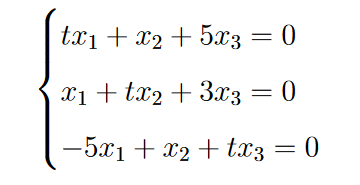

имеет нетривиальное решение? Для каждого из этих значений опишите пространство решений (размерность, базис)


In [14]:
var ("t")
ZZ[t](matrix([[t,1,5] ,[1,t,3] ,[-5,1,t]]).det()).roots(QQbar)

[(0.4712082953494914?, 1),
 (-0.2356041476747457? - 4.600709504326983?*I, 1),
 (-0.2356041476747457? + 4.600709504326983?*I, 1)]

In [48]:
x = var ("x1,x2,x3")
Kt = FractionField (CC[t])[x]
eqs =[t*x1 + x2 + 5*x3, x1 + t*x2 + 3*x3, -5*x1 + x2 + t*x3]
triangulation([Kt(eq.subs(t = 0.4712082953494914)) for eq in eqs ])

[0.471208295349491*x1 + x2 + 5.00000000000000*x3,
 (-0.777962742393826)*x2 + (-3.58637511395153)*x3]

Размерность = 1
базис = 1

In [39]:
x = var ("x1,x2,x3")
Kt = FractionField (CC[t])[x]
eqs =[t*x1 + x2 + 5*x3, x1 + t*x2 + 3*x3, -5*x1 + x2 + t*x3]
triangulation([Kt(eq.subs(t = -0.2356041476747457 - 4.600709504326983*I)) for eq in eqs ])

[(-0.235604147674746 - 4.60070950432698*I)*x1 + x2 + 5.00000000000000*x3,
 (-22.1110186288031 + 2.16789248293212*I)*x2 + (-5.70681244302424 - 13.8021285129809*I)*x3,
 (8.52651282912120e-14 - 7.10542735760100e-15*I)*x3]

Размерность = 0
базис = 0

In [40]:
x = var ("x1,x2,x3")
Kt = FractionField (CC[t])[x]
eqs =[t*x1 + x2 + 5*x3, x1 + t*x2 + 3*x3, -5*x1 + x2 + t*x3]
triangulation([Kt(eq.subs(t = -0.2356041476747457 + 4.600709504326983*I)) for eq in eqs ])

[(-0.235604147674746 + 4.60070950432698*I)*x1 + x2 + 5.00000000000000*x3,
 (-22.1110186288031 - 2.16789248293212*I)*x2 + (-5.70681244302424 + 13.8021285129809*I)*x3,
 (8.52651282912120e-14 + 7.10542735760100e-15*I)*x3]

Размерность = 0
базис = 0

#### Задание №4.

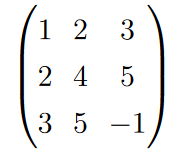

в поле вещественных чисел.

In [53]:
A = matrix([[1, 2, 3],[2, 4, 5],[3, 5, -1]])
print(A.right_eigenvectors())

[(-4.574087225857106?, [(1, 1.391048983778519?, -2.785395064471381?)], 1), (0.02557437263431835?, [(1, -0.5864323923770230?, 0.0661463857961215?)], 1), (8.548512853222788?, [(1, 1.849928863143959?, 1.282885042311623?)], 1)]


#### Задание №5.

(1 2

2 4)

в поле вещественных чисел. Ответ выразите в радикалах

In [80]:
A = matrix([[1, 2],[2, 4]])
K = A.right_eigenvectors()
print(K)

[(5, [
(1, 2)
], 1), (0, [
(1, -1/2)
], 1)]
